In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random
import numpy as np

In [27]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [28]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [29]:
model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)), # Explicitly define input layer
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20
750/750 - 8s - 10ms/step - accuracy: 0.8340 - loss: 0.4675 - val_accuracy: 0.8902 - val_loss: 0.3003
Epoch 2/20
750/750 - 7s - 10ms/step - accuracy: 0.8913 - loss: 0.2991 - val_accuracy: 0.9038 - val_loss: 0.2625
Epoch 3/20
750/750 - 4s - 5ms/step - accuracy: 0.9073 - loss: 0.2530 - val_accuracy: 0.9129 - val_loss: 0.2353
Epoch 4/20
750/750 - 4s - 5ms/step - accuracy: 0.9196 - loss: 0.2161 - val_accuracy: 0.9162 - val_loss: 0.2320
Epoch 5/20
750/750 - 5s - 7ms/step - accuracy: 0.9307 - loss: 0.1865 - val_accuracy: 0.9200 - val_loss: 0.2169
Epoch 6/20
750/750 - 4s - 5ms/step - accuracy: 0.9398 - loss: 0.1608 - val_accuracy: 0.9252 - val_loss: 0.2147
Epoch 7/20
750/750 - 4s - 5ms/step - accuracy: 0.9481 - loss: 0.1394 - val_accuracy: 0.9233 - val_loss: 0.2237
Epoch 8/20
750/750 - 3s - 5ms/step - accuracy: 0.9542 - loss: 0.1203 - val_accuracy: 0.9259 - val_loss: 0.2414
Epoch 9/20
750/750 - 4s - 6ms/step - accuracy: 0.9614 - loss: 0.1037 - val_accuracy: 0.9273 - val_loss: 0.2376

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"\nFinal Test Loss: {test_loss:.4f}")

Final Test Accuracy: 0.9210

Final Test Loss: 0.4331


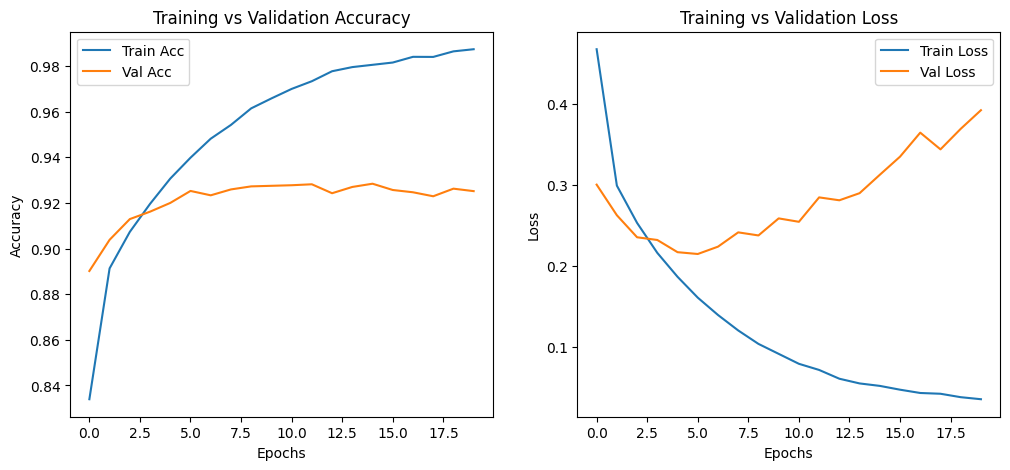

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

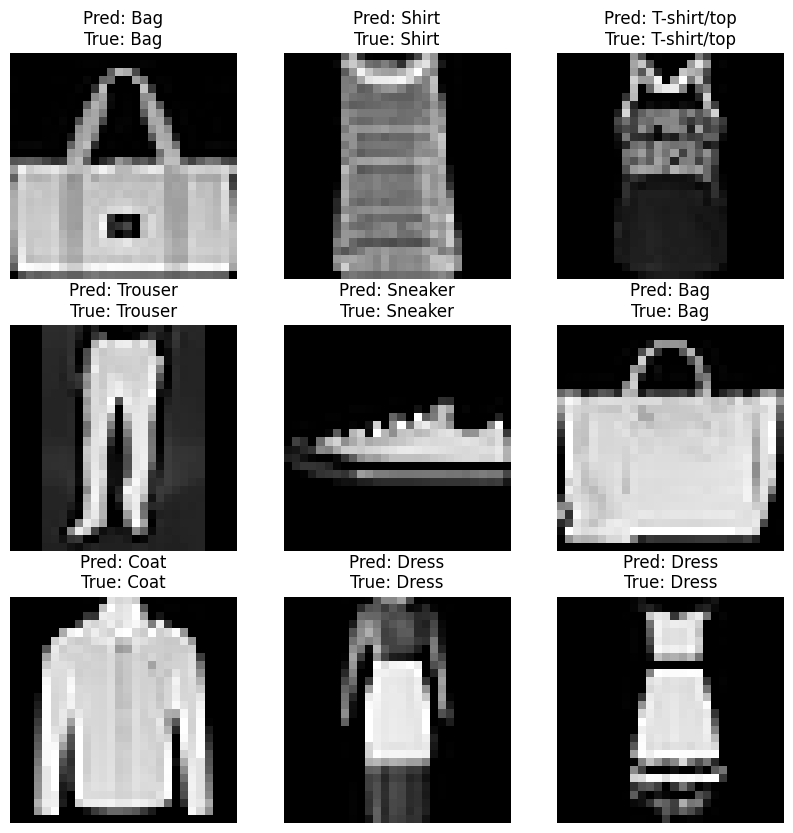

In [34]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,10))
for i in range(9):
    idx = random.randint(0, len(x_test)-1)
    img = x_test[idx]
    true_label = y_test[idx]

    pred = model.predict(img[np.newaxis, ...], verbose=0)
    pred_label = np.argmax(pred)

    plt.subplot(3,3,i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}")
    plt.axis('off')

plt.show()